In [38]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_images, test_images = train_images / 255, test_images / 255

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 1  정확도:', test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7826 - loss: 0.6066
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8651 - loss: 0.3667
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8794 - loss: 0.3313
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8875 - loss: 0.2993
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8900 - loss: 0.2903
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8987 - loss: 0.2723
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9014 - loss: 0.2631
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9045 - loss: 0.2521
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9091 - loss: 0.2426
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9116 - loss: 0.2325
313/313 - 1s - 3ms/step - accuracy: 0.8759 - loss: 0.3457

테스트 1  정확도: 0.8758999705314636


In [41]:
train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]
train_images, test_images = train_images / 255, test_images / 255

In [42]:
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), padding='same', filters=32),
    keras.layers.MaxPooling2D((3, 3), strides=2),
    keras.layers.Conv2D(kernel_size=(3, 3), padding='same', filters=64),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size=(3, 3), padding='same', filters=32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 6, 6, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 189,322 (739.54 KB)

 Trainable params: 189,322 (739.54 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(train_images, train_labels, epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 69s 48ms/step - accuracy: 0.5891 - loss: 1.0839 - val_accuracy: 0.8144 - val_loss: 0.5068
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.8316 - loss: 0.4552 - val_accuracy: 0.8591 - val_loss: 0.3879
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 48ms/step - accuracy: 0.8616 - loss: 0.3770 - val_accuracy: 0.8706 - val_loss: 0.3573
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.8736 - loss: 0.3413 - val_accuracy: 0.8739 - val_loss: 0.3367
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.8826 - loss: 0.3143 - val_accuracy: 0.8815 - val_loss: 0.3206


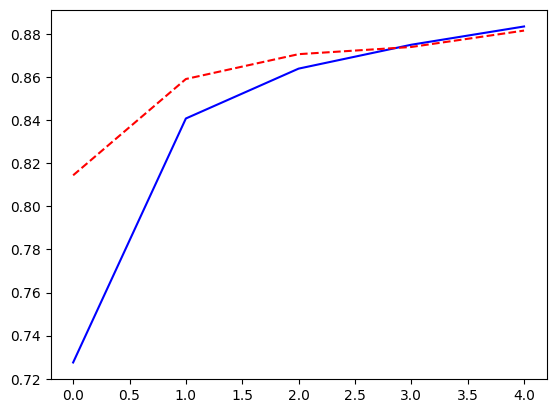

In [44]:
plt.plot(hist.history['accuracy'], 'b-')
plt.plot(hist.history['val_accuracy'], 'r--')

In [45]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 4s - 13ms/step - accuracy: 0.8811 - loss: 0.3353

테스트 정확도: 0.8810999989509583


In [46]:
mnist_lbl = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

images = test_images[:50]
pred = np.argmax(model.predict(images), axis=1)

print('예측값 =', pred)
print('실제값 =', test_labels[:50])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
예측값 = [9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 6 8 0 2 7 7 5 1 2 6 0 9 4 8 8 3 3 8 0 7
 5 7 9 6 1 6 7 6 7 6 1 6 6]
실제값 = [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2]
